In [96]:
import numpy as np 
import pandas as pd 


In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model


from keras.models import Sequential
import matplotlib.patches as mpatches
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [98]:
df = pd.read_csv("testset.csv")

In [81]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


# Part 1: A quick analysis of Weather Conditions

In [52]:
df[' _conds'].value_counts()

Haze                             47602
Smoke                            20760
Mist                              9375
Clear                             3129
Widespread Dust                   2856
Fog                               2760
Scattered Clouds                  2209
Partly Cloudy                     2091
Shallow Fog                       1860
Mostly Cloudy                     1537
Light Rain                        1302
Partial Fog                       1031
Patches of Fog                     901
Thunderstorms and Rain             486
Heavy Fog                          421
Light Drizzle                      414
Rain                               394
Unknown                            383
Blowing Sand                       378
Overcast                           326
Thunderstorm                       192
Light Thunderstorms and Rain       176
Drizzle                            112
Light Thunderstorm                  64
Light Fog                           64
Heavy Rain               

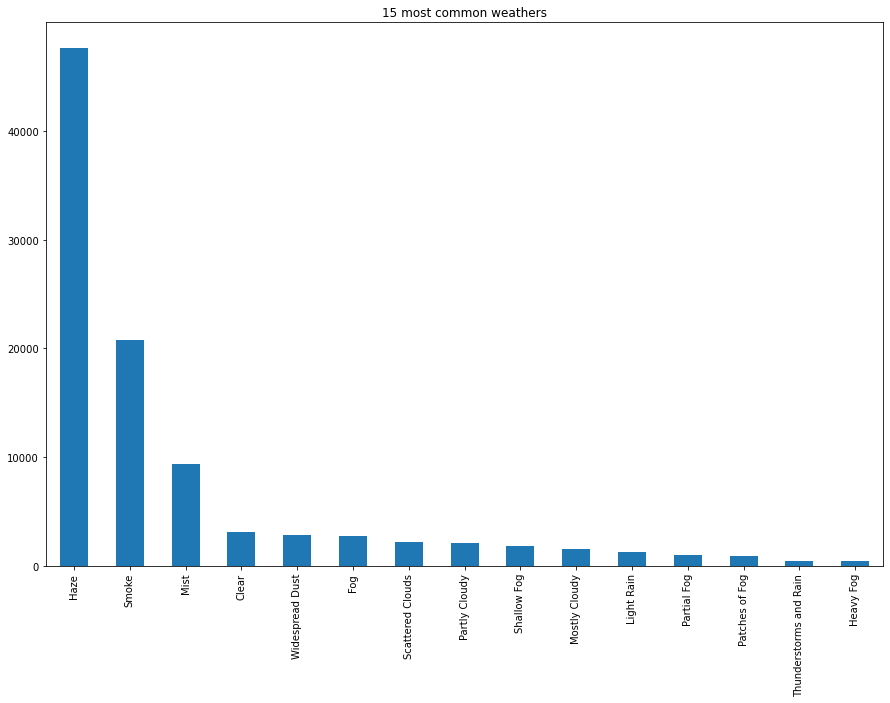

In [53]:
plt.figure(figsize=(15,10))
df[' _conds'].value_counts().head(15).plot(kind='bar')

plt.title('15 most common weathers')
plt.show()

**Haze and Smoke are most common weather conditions**

[]

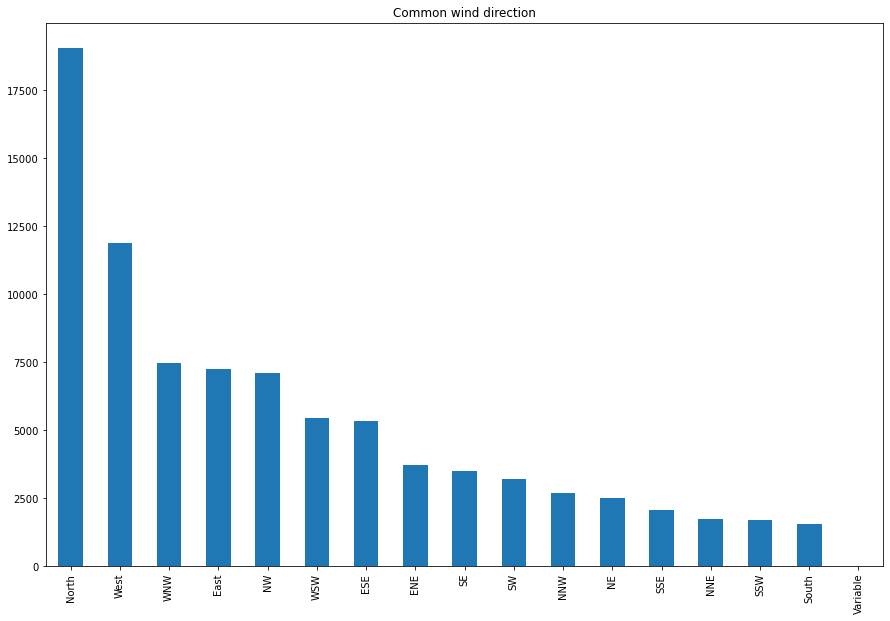

In [54]:
plt.figure(figsize=(15, 10))
plt.title("Common wind direction")
df[' _wdire'].value_counts().plot(kind="bar")
plt.plot()

**
North and West are the most common wind directions.**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


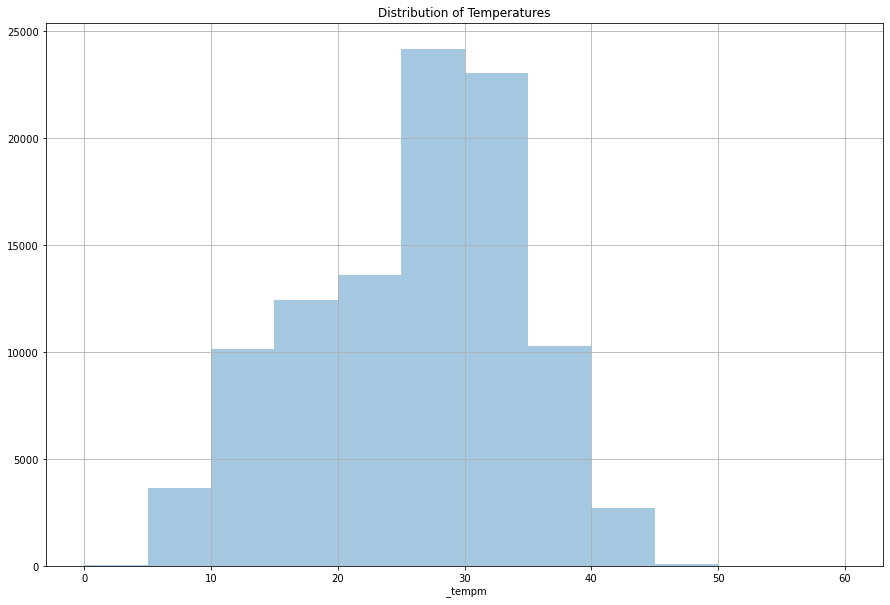

In [8]:
plt.figure(figsize=(15, 10))
sns.distplot(df[' _tempm'],bins=[i for i in range(0,61,5)], kde=False)
plt.title("Distribution of Temperatures")
plt.grid()
plt.show()

**Most common temperature scale is from 25 to 35 degree.**

In [9]:
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])

In [10]:
df['datetime_utc']

0        1996-11-01 11:00:00
1        1996-11-01 12:00:00
2        1996-11-01 13:00:00
3        1996-11-01 14:00:00
4        1996-11-01 16:00:00
                 ...        
100985   2017-04-24 06:00:00
100986   2017-04-24 09:00:00
100987   2017-04-24 12:00:00
100988   2017-04-24 15:00:00
100989   2017-04-24 18:00:00
Name: datetime_utc, Length: 100990, dtype: datetime64[ns]

In [11]:
# imputing the missing value in temperatre feature with mean.
df[' _tempm'].fillna(df[' _tempm'].mean(), inplace=True)

In [12]:
df[' _tempm'].isna().sum()
# filled all missing values with mean()

0

In [13]:
str(df['datetime_utc'][0])

'1996-11-01 11:00:00'

In [14]:
# a function to extract year part from the whole date
def get_year(x):
    return x[0:4]

In [15]:
# a function to extract month part from the whole date
def get_month(x):
    return x[5:7]

In [16]:
# making two new features year and month
df['year'] = df['datetime_utc'].apply(lambda x: get_year(str(x)))
df['month'] = df['datetime_utc'].apply(lambda x: get_month(str(x)))

In [17]:
df['year']

0         1996
1         1996
2         1996
3         1996
4         1996
          ... 
100985    2017
100986    2017
100987    2017
100988    2017
100989    2017
Name: year, Length: 100990, dtype: object

In [18]:
temp_year = pd.crosstab(df['year'], df['month'], values=df[' _tempm'], aggfunc='mean')

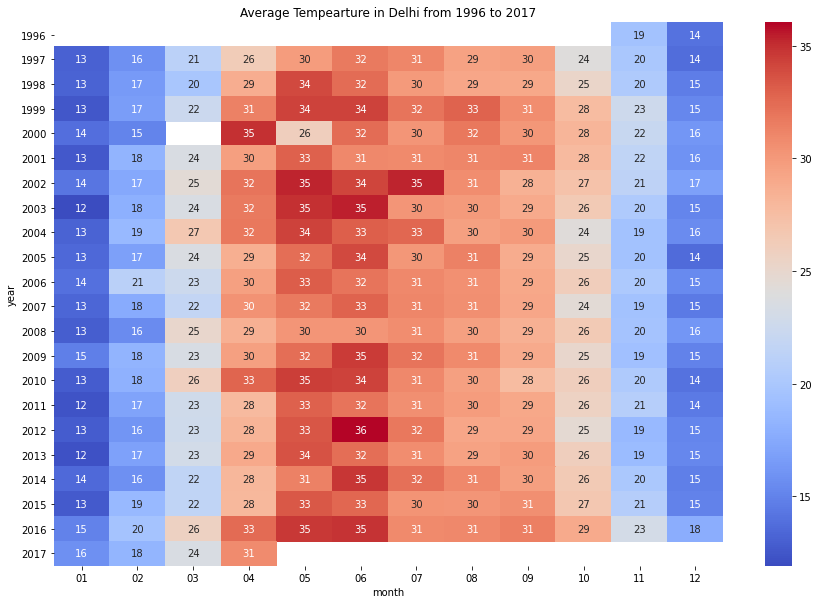

In [19]:
plt.figure(figsize=(15, 10))
sns.heatmap(temp_year, cmap='coolwarm', annot=True)
plt.title("Average Tempearture in Delhi from 1996 to 2017")
plt.show()

In [20]:
df[' _hum'].isna().sum()

757

In [21]:
# imputing missing values in _hum feature with mean
df[' _hum'].fillna(df[' _hum'].mean(), inplace=True)

In [22]:
humidity_year = pd.crosstab(df['year'], df['month'], values=df[' _hum'], aggfunc='mean')

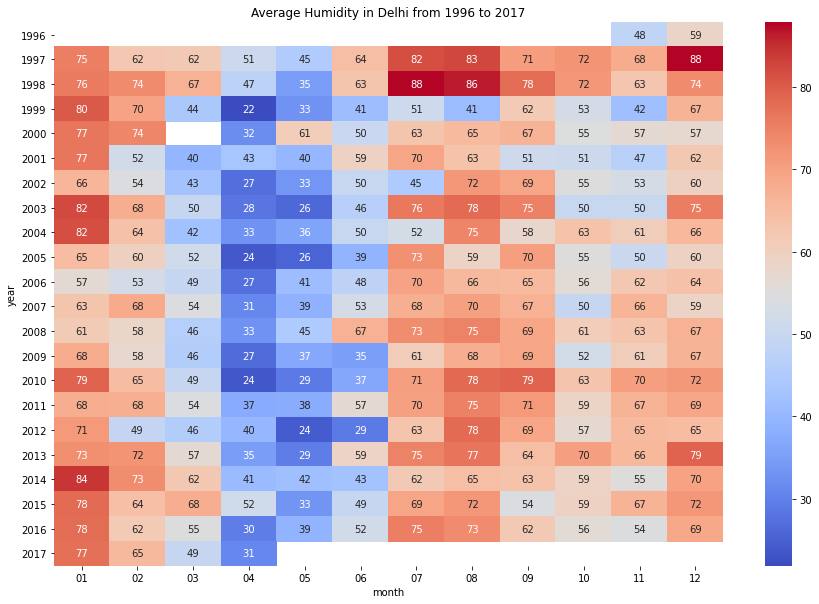

In [23]:
plt.figure(figsize=(15, 10))
sns.heatmap(humidity_year, cmap='coolwarm', annot=True)
plt.title("Average Humidity in Delhi from 1996 to 2017")
plt.show()

# Part 2: Time Series Forecasting

In [24]:
# taking only temperature feature as values and datetime feature as index in the dataframe for time series forecasting of temperature
data = pd.DataFrame(list(df[' _tempm']), index=df['datetime_utc'], columns=['temp'])

In [25]:
data

,temp
datetime_utc,
1996-11-01 11:00:00,30.0
1996-11-01 12:00:00,28.0
1996-11-01 13:00:00,24.0
1996-11-01 14:00:00,24.0
1996-11-01 16:00:00,23.0
...,...
2017-04-24 06:00:00,34.0
2017-04-24 09:00:00,38.0
2017-04-24 12:00:00,36.0


In [26]:
# resampling data with date frequency for time series forecasting
data = data.resample('D').mean()

In [27]:
data.temp.isna().sum()

141

In [28]:
data.fillna(data['temp'].mean(), inplace=True)

In [29]:
data.temp.isna().sum()

0

In [30]:
data.shape

(7480, 1)

In [31]:
data

,temp
datetime_utc,
1996-11-01,22.333333
1996-11-02,22.916667
1996-11-03,21.791667
1996-11-04,22.722222
1996-11-05,27.800000
...,...
2017-04-20,34.500000
2017-04-21,34.250000
2017-04-22,32.900000


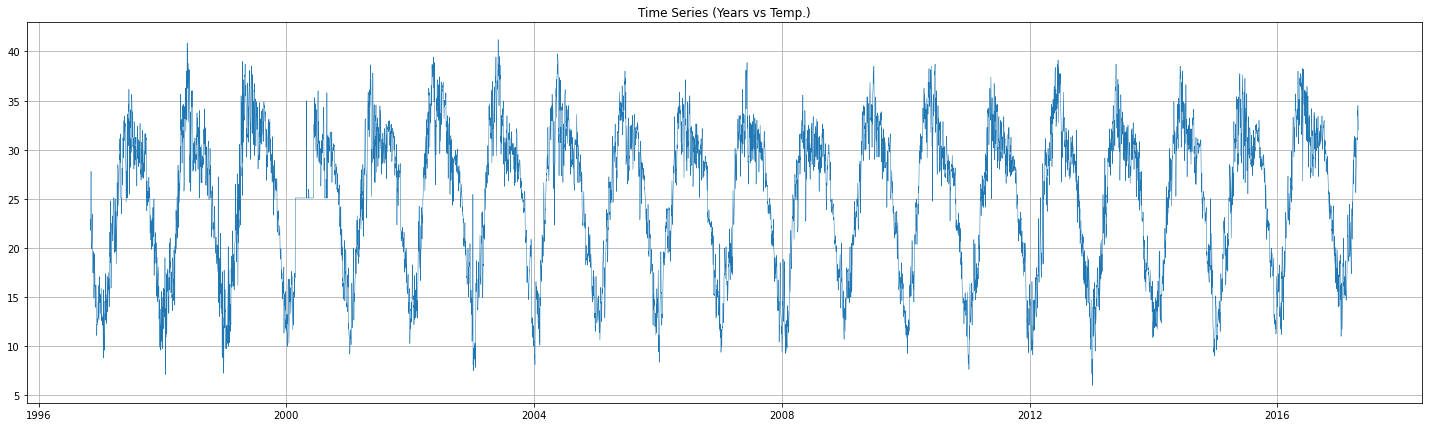

In [32]:
plt.figure(figsize=(25, 7))
plt.plot(data, linewidth=.5)
plt.grid()
plt.title("Time Series (Years vs Temp.)")
plt.show()

In [33]:
# Scaling data to get rid of outliers
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(-1,1))
data_scaled = scalar.fit_transform(data)

In [34]:
data_scaled

array([[-0.07224714],
       [-0.0391131 ],
       [-0.10301445],
       ...,
       [ 0.52795217],
       [ 0.52653214],
       [ 0.47683109]])

In [35]:
data_scaled.shape

(7480, 1)

In [36]:
steps = 30
inp = []
out = []
for i in range(len(data_scaled)- (steps)):
    inp.append(data_scaled[i:i+steps])
    out.append(data_scaled[i+steps])

In [37]:
inp=np.asanyarray(inp)
out=np.asanyarray(out)

In [38]:
x_train = inp[:7300,:,:]
x_test = inp[7300:,:,:]    
y_train = out[:7300]    
y_test= out[7300:]

In [39]:
inp.shape

(7450, 30, 1)

In [40]:
x_train.shape

(7300, 30, 1)

In [41]:
x_test.shape

(150, 30, 1)

In [42]:
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping
early_stop = EarlyStopping(monitor = "loss", mode = "min", patience = 7)
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(30,1)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(30))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Bidirectional(LSTM(128, activation='relu')))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

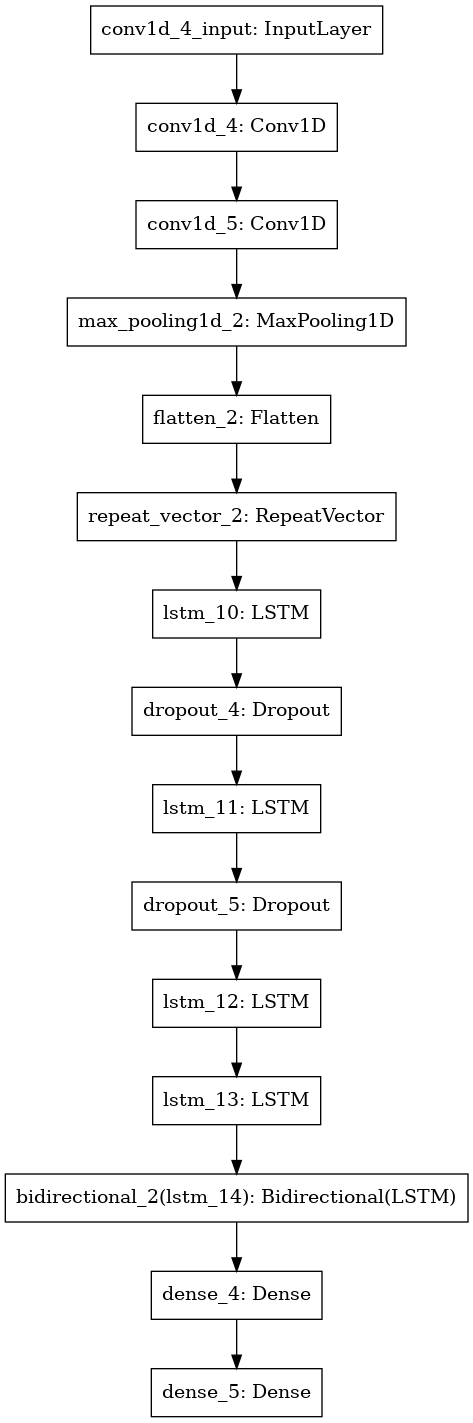

In [105]:
plot_model(model, to_file='model.png')

In [44]:
history = model.fit(x_train,y_train,epochs=300, verbose=1, callbacks = [early_stop] )

Epoch 1/300
229/229 [==============================] - 62s 223ms/step - loss: 0.0359
Epoch 2/300
229/229 [==============================] - 52s 227ms/step - loss: 0.0117
Epoch 3/300
229/229 [==============================] - 55s 240ms/step - loss: 0.0114
Epoch 4/300
229/229 [==============================] - 59s 256ms/step - loss: 0.0108
Epoch 5/300
229/229 [==============================] - 54s 234ms/step - loss: 0.0102
Epoch 6/300
229/229 [==============================] - 56s 245ms/step - loss: 0.0105
Epoch 7/300
229/229 [==============================] - 54s 234ms/step - loss: 0.0100
Epoch 8/300
229/229 [==============================] - 55s 241ms/step - loss: 0.0099
Epoch 9/300
229/229 [==============================] - 57s 250ms/step - loss: 0.0098
Epoch 10/300
229/229 [==============================] - 55s 241ms/step - loss: 0.0096
Epoch 11/300
229/229 [==============================] - 54s 234ms/step - loss: 0.0092
Epoch 12/300
229/229 [==============================] - 53s 233

In [46]:
predict = model.predict(x_test)

In [47]:
predict = scalar.inverse_transform(predict)

In [48]:
Ytesting = scalar.inverse_transform(y_test)

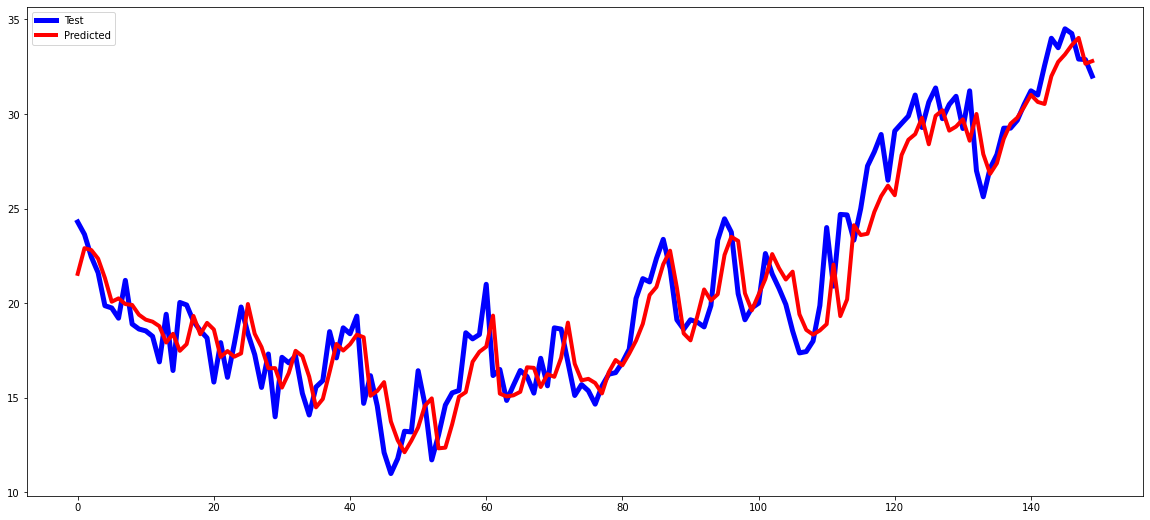

In [49]:
plt.figure(figsize=(20,9))
plt.plot(Ytesting , 'blue', linewidth=5)
plt.plot(predict,'r' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.show()

In [50]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Ytesting, predict)

3.092416147386307

In [110]:
data=df.copy()

In [112]:
data['datetime_utc'] = pd.to_datetime(data['datetime_utc'])
data.set_index('datetime_utc', inplace= True)
data =data.resample('D').mean()

In [113]:
data = data[[' _tempm' ]]

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7480 entries, 1996-11-01 to 2017-04-24
Freq: D
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0    _tempm  7336 non-null   float64
dtypes: float64(1)
memory usage: 116.9 KB


In [115]:
from scipy.interpolate import interp1d


In [116]:
data[' _tempm'] = data[' _tempm'].interpolate()# we will fill the null row

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7480 entries, 1996-11-01 to 2017-04-24
Freq: D
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0    _tempm  7480 non-null   float64
dtypes: float64(1)
memory usage: 116.9 KB


In [118]:
data.head()

,_tempm
datetime_utc,
1996-11-01,22.333333
1996-11-02,22.916667
1996-11-03,21.791667
1996-11-04,22.722222
1996-11-05,27.800000


In [119]:
df = data.copy()

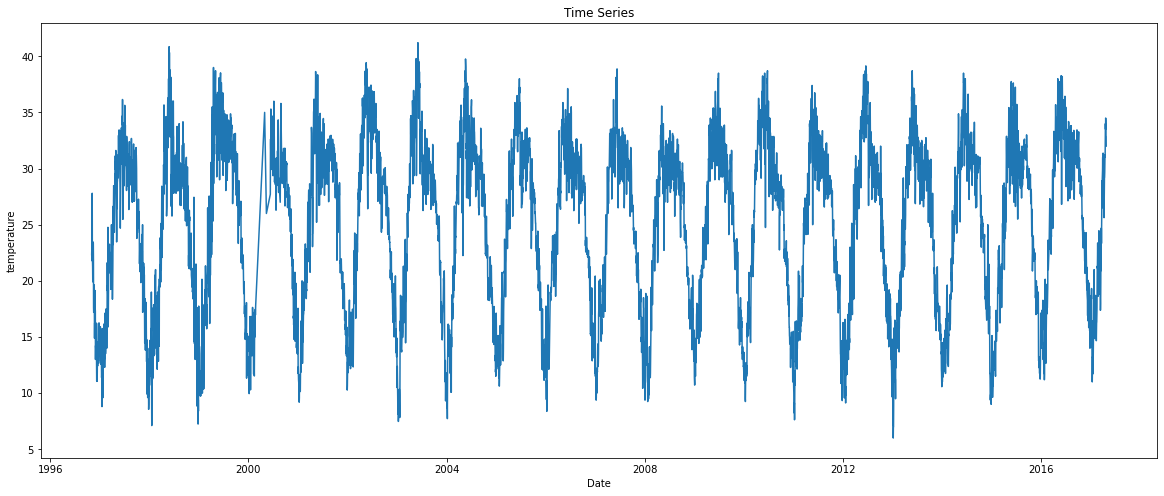

In [120]:
plt.figure(figsize=(20,8))
plt.plot(data)
plt.title('Time Series')
plt.xlabel('Date')
plt.ylabel('temperature')
plt.show()

<a id="1"></a> <br>
# Time Series Forecast using LSTM

In [121]:
data=data.values
data = data.astype('float32')

In [122]:
scaler= MinMaxScaler(feature_range=(-1,1))
sc = scaler.fit_transform(data)

In [123]:
sc

array([[-0.07224715],
       [-0.03911316],
       [-0.10301447],
       ...,
       [ 0.5279522 ],
       [ 0.5265322 ],
       [ 0.47683108]], dtype=float32)

In [124]:
timestep = 30

X= []
Y=[]


for i in range(len(sc)- (timestep)):
    X.append(sc[i:i+timestep])
    Y.append(sc[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 7300
Xtrain = X[:k,:,:]
Xtest = X[k:,:,:]    
Ytrain = Y[:k]    
Ytest= Y[k:]   

In [125]:
print(Xtrain.shape)
print(Xtest.shape)

(7300, 30, 1)
(150, 30, 1)


<a id="1"></a> <br>
# **CNN-LSTM Model**

In [126]:
from keras.layers import Dense,RepeatVector
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [127]:
#model = Sequential()
#model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(30,1)))
#model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))
#model.add(Flatten())
#model.add(RepeatVector(30))
#model.add(LSTM(128, activation='relu'))
#model.add(Dense(100, activation='relu'))
#model.add(Dense(1))
#model.compile(loss='mse', optimizer='adam')
#model.fit(Xtrain,Ytrain,epochs=300, verbose=0 )

 # LSTM Model

In [128]:
model = Sequential()

model.add(LSTM(32,activation = 'relu', input_shape= (30,1), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(LSTM(32, activation='sigmoid', return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [129]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 30, 32)            4352      
                                                                 
 lstm_9 (LSTM)               (None, 30, 32)            8320      
                                                                 
 lstm_10 (LSTM)              (None, 32)                8320      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


In [130]:
history = model.fit(Xtrain,Ytrain,epochs=50, verbose=1)

Epoch 1/50
229/229 [==============================] - 12s 38ms/step - loss: 0.0469
Epoch 2/50
229/229 [==============================] - 9s 41ms/step - loss: 0.0156
Epoch 3/50
229/229 [==============================] - 10s 42ms/step - loss: 0.0119
Epoch 4/50
229/229 [==============================] - 10s 42ms/step - loss: 0.0097
Epoch 5/50
229/229 [==============================] - 10s 43ms/step - loss: 0.0093
Epoch 6/50
229/229 [==============================] - 9s 40ms/step - loss: 0.0090
Epoch 7/50
229/229 [==============================] - 10s 42ms/step - loss: 0.0092
Epoch 8/50
229/229 [==============================] - 9s 41ms/step - loss: 0.0094
Epoch 9/50
229/229 [==============================] - 10s 43ms/step - loss: 0.0091
Epoch 10/50
229/229 [==============================] - 10s 42ms/step - loss: 0.0091
Epoch 11/50
229/229 [==============================] - 10s 42ms/step - loss: 0.0091
Epoch 12/50
229/229 [==============================] - 9s 40ms/step - loss: 0.0089
Epoch

Text(0.5, 1.0, 'Model Accuracy')

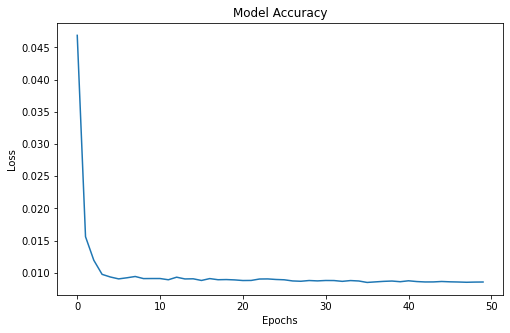

In [131]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Accuracy")

In [132]:
model

In [133]:
preds= model.predict(Xtest)
preds = scaler.inverse_transform(preds)


Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 
Ytest = scaler.inverse_transform(Ytest)


Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 
Ytrain = scaler.inverse_transform(Ytrain)

mean_squared_error(Ytest,preds)

2.8365455

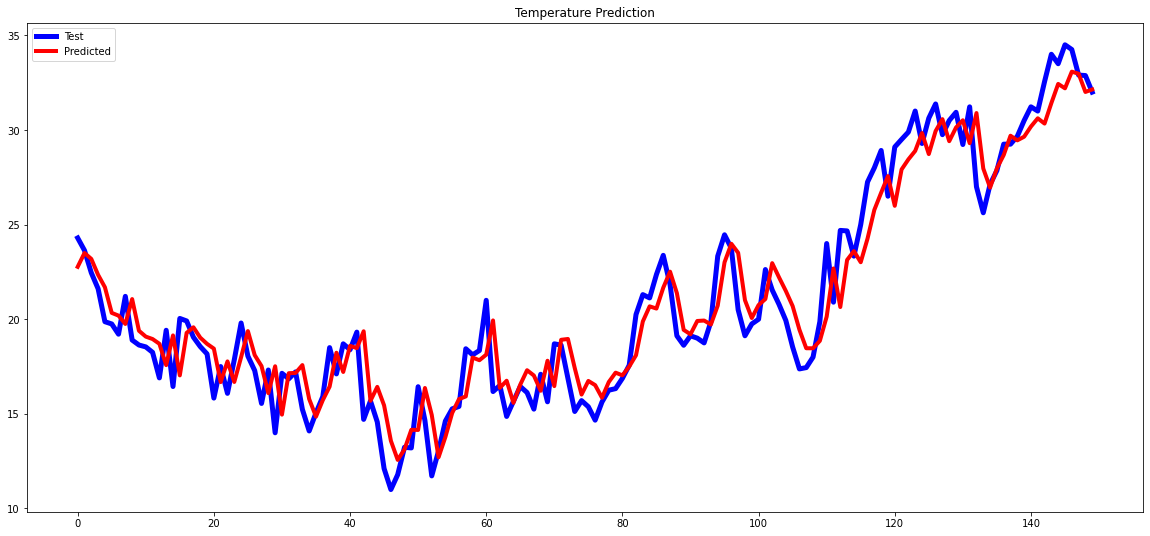

In [134]:
plt.figure(figsize=(20,9))
plt.plot(Ytest , 'blue', linewidth=5)
plt.plot(preds,'r' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.title("Temperature Prediction")
plt.show()

In [135]:
test = pd.DataFrame(Ytest,columns=['Actual'])
pred = pd.DataFrame(preds,columns=['Predict'])

In [136]:
results = pd.concat([test,pred],axis=1)

In [137]:
results.head(20)

,Actual,Predict
0,24.294117,22.768913
1,23.636364,23.498983
2,22.454546,23.186708
3,21.611111,22.344763
4,19.869566,21.690344
5,19.750000,20.335772
6,19.208334,20.190226
7,21.208334,19.750553
8,18.900000,21.065786
9,18.636364,19.390215


In [138]:
def insert_end(Xin,new_input):
    #print ('Before: \n', Xin , new_input )
    for i in range(timestep-1):
        Xin[:,i,:] = Xin[:,i+1,:]
    Xin[:,timestep-1,:] = new_input
    #print ('After :\n', Xin)
    return Xin


In [139]:
df

,_tempm
datetime_utc,
1996-11-01,22.333333
1996-11-02,22.916667
1996-11-03,21.791667
1996-11-04,22.722222
1996-11-05,27.800000
...,...
2017-04-20,34.500000
2017-04-21,34.250000
2017-04-22,32.900000


In [140]:
# this section for unknown future
#we are getting next 30 steps
from datetime import timedelta
future=30
forcast = []
Xin = Xtest[-1:,:,:]
time=[]
for i in range(future):
    out = model.predict(Xin, batch_size=1)    
    forcast.append(out[0,0]) 
    print(forcast)
    Xin = insert_end(Xin,out[0,0]) 
    time.append(pd.to_datetime(df.index[-1])+timedelta(days=i+1))


[0.48475903]
[0.48475903, 0.45350465]
[0.48475903, 0.45350465, 0.43235993]
[0.48475903, 0.45350465, 0.43235993, 0.4173822]
[0.48475903, 0.45350465, 0.43235993, 0.4173822, 0.4066797]
[0.48475903, 0.45350465, 0.43235993, 0.4173822, 0.4066797, 0.39822778]
[0.48475903, 0.45350465, 0.43235993, 0.4173822, 0.4066797, 0.39822778, 0.39055148]
[0.48475903, 0.45350465, 0.43235993, 0.4173822, 0.4066797, 0.39822778, 0.39055148, 0.38307774]
[0.48475903, 0.45350465, 0.43235993, 0.4173822, 0.4066797, 0.39822778, 0.39055148, 0.38307774, 0.375518]
[0.48475903, 0.45350465, 0.43235993, 0.4173822, 0.4066797, 0.39822778, 0.39055148, 0.38307774, 0.375518, 0.36758795]
[0.48475903, 0.45350465, 0.43235993, 0.4173822, 0.4066797, 0.39822778, 0.39055148, 0.38307774, 0.375518, 0.36758795, 0.3595816]
[0.48475903, 0.45350465, 0.43235993, 0.4173822, 0.4066797, 0.39822778, 0.39055148, 0.38307774, 0.375518, 0.36758795, 0.3595816, 0.35219088]
[0.48475903, 0.45350465, 0.43235993, 0.4173822, 0.4066797, 0.39822778, 0.390551

In [141]:
forcasted_output=np.asanyarray(forcast)   
forcasted_output=forcasted_output.reshape(-1,1) 
forcasted_output = scaler.inverse_transform(forcasted_output) 

In [142]:
forcasted_output = pd.DataFrame(forcasted_output)
date = pd.DataFrame(time)
df_result = pd.concat([date,forcasted_output],axis=1)
df_result.columns = "Date","Forecasted"

In [143]:
df.columns

Index([' _tempm'], dtype='object')

In [144]:
df_result

,Date,Forecasted
0,2017-04-25,32.139576
1,2017-04-26,31.589333
2,2017-04-27,31.217073
3,2017-04-28,30.953388
4,2017-04-29,30.764965
5,2017-04-30,30.616169
6,2017-05-01,30.481024
7,2017-05-02,30.349447
8,2017-05-03,30.216356
9,2017-05-04,30.076746


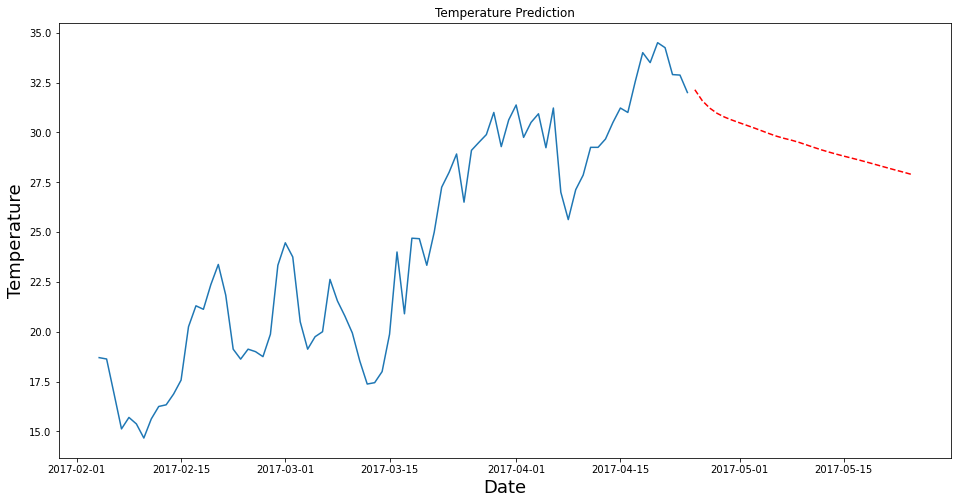

In [145]:
plt.figure(figsize=(16,8))
plt.title('Temperature Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Temperature' ,fontsize=18)
plt.plot(df[' _tempm'][7400:])
plt.plot(df_result.set_index('Date')[['Forecasted']],"r--")
